In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import json
from pathlib import Path

import pandas as pd

json_file = Path("../results/regression_ablation_results.jsonl")

list_of_dicts = [json.loads(line) for line in json_file.open()]
D = pd.DataFrame(list_of_dicts)

keep_mask = D.keep != ''
ignore_mask = D.ignore != ''
D_add = D[keep_mask]
D_sub = D[ignore_mask];

,bag_features,dataset,explained_variance,ignore,keep,mean_absolute_error,num_features,num_instances,r2,system
0,False,comb_round2.feats,-0.03,b,,0.27,12,1492,-0.05,linreg
1,False,comb_round2.feats,-0.03,,c,0.27,4,1492,-0.07,linreg
2,False,comb_round2.feats,-0.22,c,,0.28,314,1492,-0.23,linreg
3,False,comb_round2.feats,-0.03,,z,0.27,2,1492,-0.06,linreg
4,False,comb_round2.feats,-0.21,z,,0.28,316,1492,-0.22,linreg
5,False,comb_round2.feats,-0.01,,a,0.26,2,1492,-0.04,linreg
6,False,comb_round2.feats,-0.29,a,,0.29,316,1492,-0.31,linreg
7,False,comb_round2.feats,-0.22,,,0.28,318,1492,-0.23,linreg
8,False,comb_round3.feats,0.00,,z,0.26,2,450,-0.04,linreg
9,False,comb_round3.feats,-0.51,z,,0.30,218,450,-0.52,linreg


In [5]:
system_mean_absolute_error = D[~keep_mask & ~ignore_mask].set_index('dataset').mean_absolute_error
system_r2 = D[~keep_mask & ~ignore_mask].set_index('dataset').r2

### Single feature groups

#### Mean absolute error

In [6]:
by_keep_ns = D_add.groupby(('dataset', 'keep')).mean_absolute_error.mean().unstack(0).T
by_keep_ns['system'] = system_mean_absolute_error
by_keep_ns

keep,a,b,c,d,z,system
dataset,,,,,,
comb_round2.feats,0.26,0.28,0.27,0.26,0.27,0.28
comb_round3.feats,0.26,0.29,0.26,0.26,0.26,0.30
comb_round4.feats,0.37,0.41,0.36,0.37,0.35,0.39
comb_round_all.feats,0.32,0.32,0.33,0.32,0.28,0.30
da_semcor.feats,0.42,0.42,0.43,0.42,0.41,0.41
en_framenet.feats,0.23,0.26,0.24,0.24,0.22,0.24
en_masc_crowdsourced.feats,0.21,0.22,0.21,0.21,0.19,0.19
en_ritter_sst.feats,0.34,0.36,0.35,0.34,0.33,0.36
eu_semcor.feats,0.33,0.34,0.33,0.33,0.33,0.33


In [7]:
by_keep_ns.mean()

keep
a        0.31
b        0.32
c        0.31
d        0.31
z        0.29
system   0.31
dtype: float64

#### $R^2$ scores

In [8]:
by_keep_ns = D_add.groupby(('dataset', 'keep')).r2.mean().unstack(0).T
by_keep_ns['system'] = system_r2
by_keep_ns

keep,a,b,c,d,z,system
dataset,,,,,,
comb_round2.feats,-0.04,-0.27,-0.07,-0.04,-0.06,-0.23
comb_round3.feats,-0.04,-0.44,-0.06,-0.06,-0.04,-0.56
comb_round4.feats,-0.06,-0.44,-0.04,-0.05,0.01,-0.38
comb_round_all.feats,-0.07,-0.19,-0.07,-0.08,0.01,-0.13
da_semcor.feats,-0.02,-0.04,-0.06,-0.02,0.01,-0.04
en_framenet.feats,0.04,-0.29,-0.04,-0.03,0.10,-0.09
en_masc_crowdsourced.feats,-0.05,-0.12,-0.03,-0.04,0.13,0.05
en_ritter_sst.feats,-0.06,-0.60,-0.14,-0.10,-0.05,-0.57
eu_semcor.feats,-0.03,-0.04,-0.03,-0.03,0.02,0.00


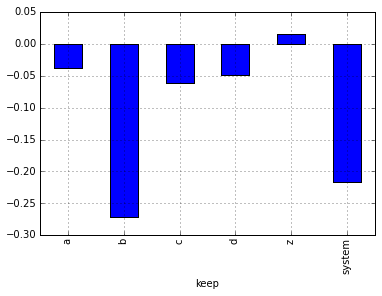

In [9]:
by_keep_ns.mean().plot(kind='bar')

### Ablation

#### Mean absolute errror

In [10]:
by_ignore_ns = D_sub.groupby(('dataset', 'ignore')).mean_absolute_error.mean().unstack(1)
by_ignore_ns['system'] = system_mean_absolute_error
by_ignore_ns

ignore,a,b,c,d,z,system
dataset,,,,,,
comb_round2.feats,0.29,0.27,0.28,0.28,0.28,0.28
comb_round3.feats,0.30,0.26,0.30,0.30,0.30,0.30
comb_round4.feats,0.39,0.35,0.39,0.39,0.41,0.39
comb_round_all.feats,0.30,0.29,0.30,0.30,0.32,0.30
da_semcor.feats,0.41,0.41,0.40,0.41,0.42,0.41
en_framenet.feats,0.24,0.22,0.23,0.23,0.25,0.24
en_masc_crowdsourced.feats,0.19,0.19,0.19,0.19,0.22,0.19
en_ritter_sst.feats,0.37,0.34,0.35,0.35,0.36,0.36
eu_semcor.feats,0.33,0.33,0.33,0.33,0.34,0.33


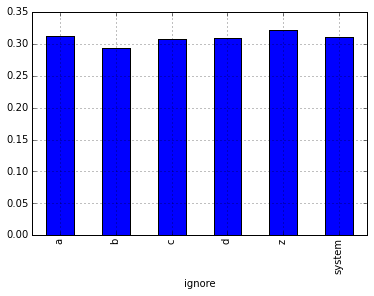

In [11]:
by_ignore_ns.mean().plot(kind='bar')

#### $R^2$ score

In [12]:
by_ignore_ns = D_sub.groupby(('dataset', 'ignore')).r2.mean().unstack(1)
by_ignore_ns['system'] = system_r2
by_ignore_ns

ignore,a,b,c,d,z,system
dataset,,,,,,
comb_round2.feats,-0.31,-0.05,-0.23,-0.23,-0.22,-0.23
comb_round3.feats,-0.53,-0.06,-0.52,-0.54,-0.52,-0.56
comb_round4.feats,-0.35,-0.02,-0.37,-0.37,-0.46,-0.38
comb_round_all.feats,-0.14,-0.00,-0.13,-0.13,-0.21,-0.13
da_semcor.feats,-0.05,-0.03,-0.00,-0.04,-0.08,-0.04
en_framenet.feats,-0.10,0.11,-0.08,-0.09,-0.21,-0.09
en_masc_crowdsourced.feats,0.06,0.11,0.05,0.05,-0.12,0.05
en_ritter_sst.feats,-0.66,-0.13,-0.50,-0.55,-0.56,-0.57
eu_semcor.feats,0.00,0.02,0.00,0.00,-0.04,0.00


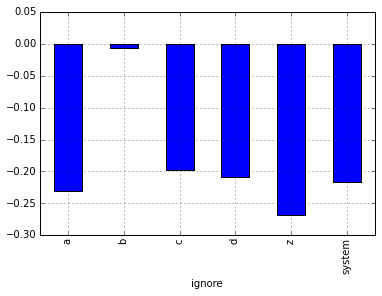

In [13]:
by_ignore_ns.mean().plot(kind='bar')